In [ ]:
import os
os.chdir("..")
os.chdir("..")

!dir

data  notekooks  requirements.txt


Imagem carregada: data/eu.jpeg
Dimensões da imagem (Altura, Largura, Canais): (800, 800, 3)
Tipo de dado dos pixels: uint8


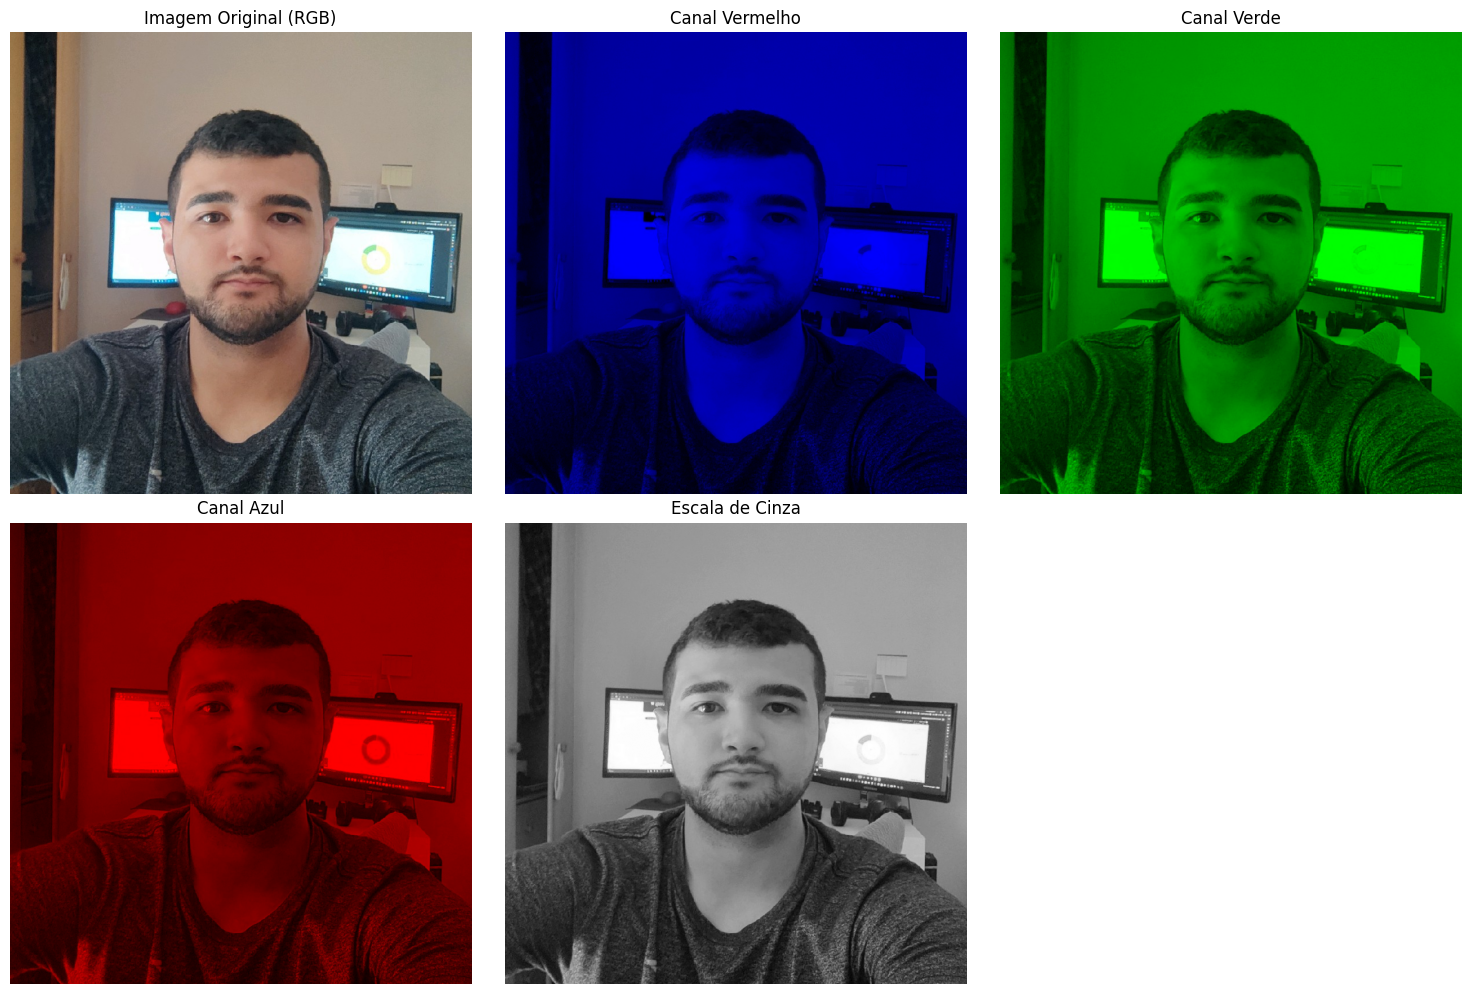

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def process_image_channels(image_path: str):
    """
    Carrega uma imagem, visualiza seus canais RGB e cria uma versão em escala de cinza.

    Args:
        image_path (str): Caminho para o arquivo da imagem.
    """
    try:
        # 1. Carrega a imagem
        # O OpenCV carrega as imagens no formato BGR por padrão
        img_bgr = cv2.imread(image_path)

        if img_bgr is None:
            raise FileNotFoundError(f"Erro: Não foi possível carregar a imagem em '{image_path}'. Verifique o caminho.")

        print(f"Imagem carregada: {image_path}")
        print(f"Dimensões da imagem (Altura, Largura, Canais): {img_bgr.shape}")
        print(f"Tipo de dado dos pixels: {img_bgr.dtype}")

        # 2. Converte de BGR para RGB para visualização com Matplotlib
        # Matplotlib espera RGB, então convertemos para ter as cores corretas
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        # 3. Separa os canais de cor
        # OpenCV retorna os canais na ordem B, G, R
        b_channel, g_channel, r_channel = cv2.split(img_bgr)

        # 4. Cria imagens monocromáticas para cada canal (para visualização)
        # Para visualizar um único canal colorido, criamos uma imagem RGB
        # onde apenas aquele canal tem intensidade, e os outros são zero.
        # Por exemplo, para o canal vermelho, os canais B e G são zeros.
        zeros = np.zeros(img_bgr.shape[:2], dtype=img_bgr.dtype)

        img_red = cv2.merge([zeros, zeros, r_channel])   # Apenas Vermelho
        img_green = cv2.merge([zeros, g_channel, zeros]) # Apenas Verde
        img_blue = cv2.merge([b_channel, zeros, zeros])  # Apenas Azul

        # 5. Converte para escala de cinza
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        # 6. Visualiza as imagens
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 3, 1)
        plt.imshow(img_rgb)
        plt.title('Imagem Original (RGB)')
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(img_red) # Já está em RGB, pois construímos com cv2.merge
        plt.title('Canal Vermelho')
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.imshow(img_green) # Já está em RGB
        plt.title('Canal Verde')
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.imshow(img_blue) # Já está em RGB
        plt.title('Canal Azul')
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.imshow(img_gray, cmap='gray') # Usamos cmap='gray' para visualizar corretamente
        plt.title('Escala de Cinza')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

# --- Para executar o código ---
# Você precisará de uma imagem. Salve uma imagem (ex: 'minha_imagem.jpg')
# no mesmo diretório do seu script Python, ou forneça o caminho completo.

# Exemplo de uso:
# Crie um arquivo de imagem chamado 'exemplo.jpg' no mesmo diretório
# ou forneça o caminho completo para uma imagem em seu computador.
# Você pode usar qualquer imagem PNG ou JPG.
# Por exemplo, baixe uma imagem qualquer da internet e salve como 'exemplo.jpg'.
image_file = 'data/eu.jpeg'
process_image_channels(image_file)